## Import relevant modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm, poisson, uniform, skew, kurtosis, iqr
from statsmodels.graphics.gofplots import qqplot

## Iris dataset

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.drop(columns=['Unnamed: 0'], inplace=True)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Distributions

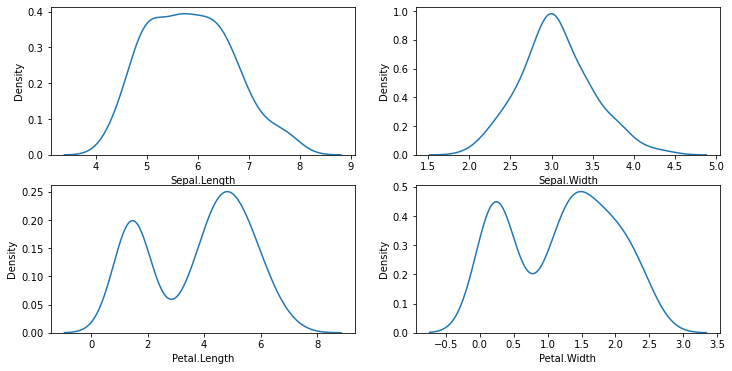

In [3]:
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.kdeplot(iris['Sepal.Length'], ax=ax[0,0])
sns.kdeplot(iris['Sepal.Width'], ax=ax[0,1])
sns.kdeplot(iris['Petal.Length'], ax=ax[1,0])
sns.kdeplot(iris['Petal.Width'], ax=ax[1,1]);

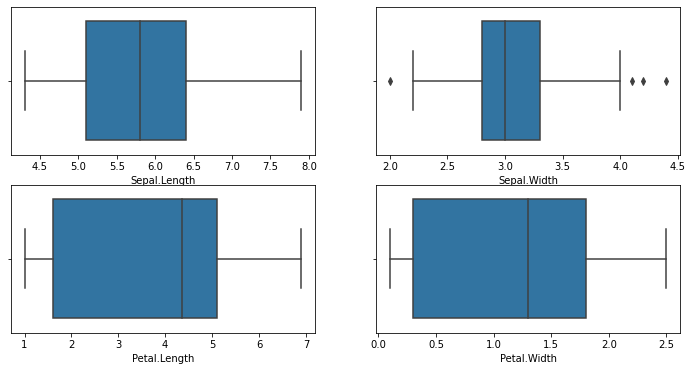

In [4]:
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.boxplot(data=iris, x='Sepal.Length', ax=ax[0,0])
sns.boxplot(data=iris, x='Sepal.Width', ax=ax[0,1])
sns.boxplot(data=iris, x='Petal.Length', ax=ax[1,0])
sns.boxplot(data=iris, x='Petal.Width', ax=ax[1,1]);

### Normal distribution

$$f(\mu | \sigma^2) = {\frac{1}{\sqrt{2 \pi \sigma^2}}e^-{- \frac {(x - \mu)^2}{2 \sigma^2}} }$$

where $\mu$ is the *mean* and $\sigma$ is the *standard deviation* of the data.

Standard normal distribution: $\mu = 0$, $\sigma = 1$

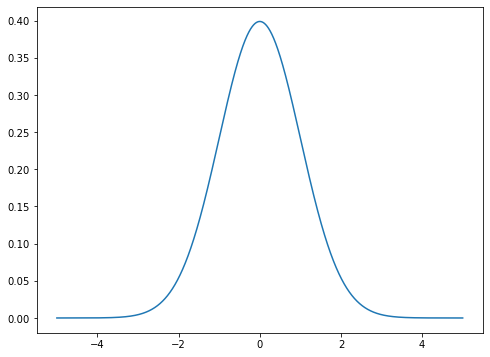

In [5]:
x = np.linspace(-5, 5, 10000)
plt.figure(figsize=(8,6))
plt.plot(x, norm.pdf(x));

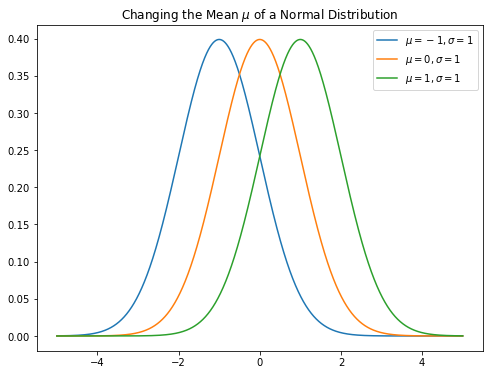

In [6]:
x = np.linspace(-5, 5, 10000)
plt.figure(figsize=(8,6))
for mu in (-1, 0, 1):
    plt.plot(x, norm.pdf(x, loc=mu, scale=1), label=f"$\mu={mu}, \sigma=1$")
plt.legend()
plt.title("Changing the Mean $\mu$ of a Normal Distribution");

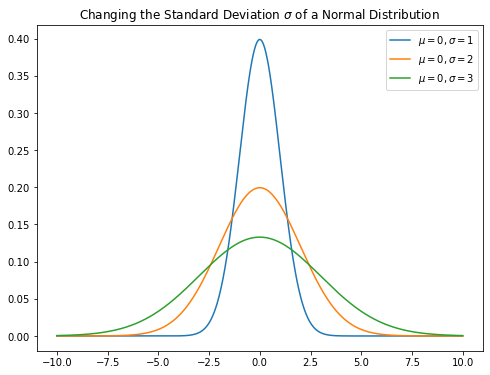

In [7]:
x = np.linspace(-10, 10, 10000)
plt.figure(figsize=(8,6))
for sigma in (1, 2, 3):
    plt.plot(x, norm.pdf(x, loc=0, scale=sigma), label=f"$\mu=0, \sigma={sigma}$")
plt.legend()
plt.title("Changing the Standard Deviation $\sigma$ of a Normal Distribution");

Emprical Rule:
For a normally distributed data, the following is true
1. $68\%$ of the data lies within **one** standard deviation of the mean
2. $95\%$ of the data lies within **two** standard deviation of the mean
3. $97.5\%$ of the data lies within **three** standard deviation of the mean

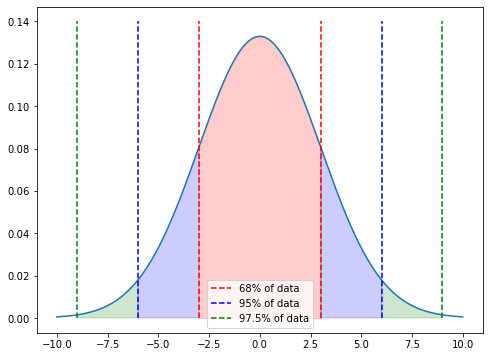

In [8]:
mu = 0
sigma = 3
x = np.linspace(-10, 10, 10000)
y = norm.pdf(x, loc=mu, scale=sigma)

x1= np.array([sigma, sigma])
y1 = [0, 0.14]

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.plot(x1, y1, 'r--', label="68% of data")
plt.plot([x*-1 for x in x1], y1, 'r--')
plt.fill_between(x, y, where=((x < sigma) & (x > -1*sigma)), color='r', alpha=0.2)
plt.plot([x*2 for x in x1], y1, 'b--', label="95% of data")
plt.plot([x*-2 for x in x1], y1, 'b--')
plt.fill_between(x, y, where=(((x > sigma) & (x < 2*sigma)) | ((x < -1*sigma) & (x > -2*sigma))), \
                 color='b', alpha=0.2)
plt.plot([x*3 for x in x1], y1, 'g--', label="97.5% of data")
plt.plot([x*-3 for x in x1], y1, 'g--')
plt.fill_between(x, y, where=(((x > 2*sigma) & (x < 3*sigma)) | ((x < -2*sigma) & (x > -3*sigma))), \
                 color='g', alpha=0.2)

plt.legend();

### Skewness

Measure of asymmetry in the distribution of a data set.
- Symmetric (unskewed): distribution of data is mirrored evenly along both sides of the median
- Negatively skewed: distribution of data is concetrated on the right side of the graph, the left tail is longer (skewed to the left)
- Positively skewed: distribution of data is concetrated on the left side of the graph, the right tail is longer (skewed to the right)

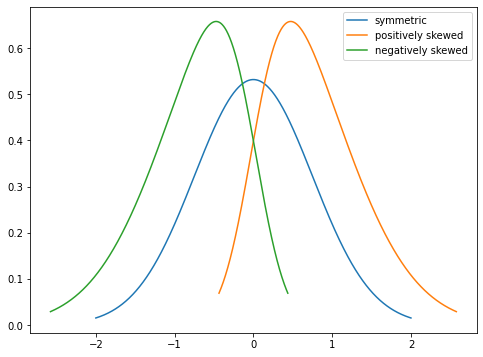

In [9]:
plt.figure(figsize=(8,6))
x1 = np.linspace(-2, 2, 1000)
x2 = np.linspace(skewnorm.ppf(0.01, 3), skewnorm.ppf(0.99, 3), 1000)
x3 = np.linspace(skewnorm.ppf(0.01, -3), skewnorm.ppf(0.99, -3), 1000)
y1 = norm.pdf(x1, scale=0.75)
y2 = skewnorm.pdf(x2, 3)
y3 = skewnorm.pdf(x3, -3)
plt.plot(x1, y1, label=f"symmetric")
plt.plot(x2, y2, label=f"positively skewed")
plt.plot(x3, y3, label=f"negatively skewed")
plt.legend();

- Symmetric: the mean is equal to the median
- Negatively skewed: the mean is less than the median
- Positively skewed: the mean is greater than the median

In [10]:
# Fucntion to create skewed distribution
def randn_skew_fast(N, alpha=0.0, loc=0.0, scale=1.0):
    sigma = alpha / np.sqrt(1.0 + alpha**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1

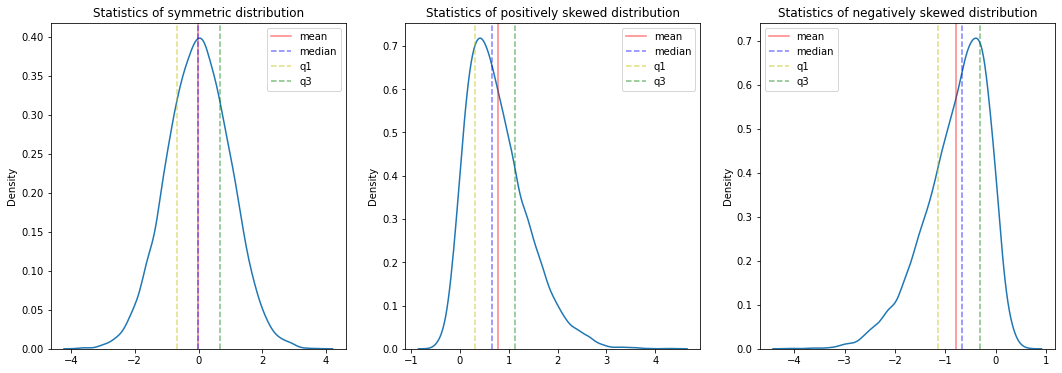

In [11]:
x1 = randn_skew_fast(10000)
x2 = randn_skew_fast(10000, alpha=5)
x3 = randn_skew_fast(10000, alpha=-5)
skew_stats = [(x1, "symmetric"), (x2, "positively skewed"), (x3, "negatively skewed")]

fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, s in enumerate(skew_stats):
    sns.kdeplot(s[0], ax=ax[i])
    ax[i].axvline(np.mean(s[0]), c='r', ls='-', alpha=0.5, label="mean")
    ax[i].axvline(np.median(s[0]), c='b', ls='--', alpha=0.5, label="median")
    ax[i].axvline(np.quantile(s[0], 0.25), c='y', ls='--', alpha=0.5, label="q1")
    ax[i].axvline(np.quantile(s[0], 0.75), c='g', ls='--', alpha=0.5, label="q3")
    ax[i].legend()
    ax[i].set_title("Statistics of {} distribution".format(s[1]));

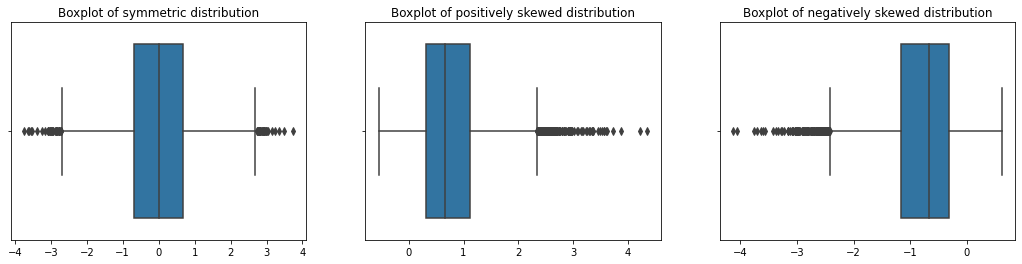

In [12]:
fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for i, s in enumerate(skew_stats):
    sns.boxplot(x=s[0], ax=ax[i])
    ax[i].set_title("Boxplot of {} distribution".format(s[1]));

- Symmetric: skewness value around 0 (0 represents perfectly symmetric distribution)
- Negatively skewed: skewness value less than 0 (less than -1 represents highly skewed distribution)
- Positively skewed: skewness value more than 0 (more than 1 represents highly skewed distribution)

In [13]:
for s in skew_stats:
    print("Skewness value of a {} distribution: {:.4f}".format(s[1], skew(s[0], bias=0)))

Skewness value of a symmetric distribution: -0.0250
Skewness value of a positively skewed distribution: 0.9042
Skewness value of a negatively skewed distribution: -0.8556


### Kurtosis

Measure of tailed-ness (how heavily is the data saturated in the tails of the distribution as opposed to its center)

- Mesokurtic: kurtosis value is 0 ($=0$), thickness of its tails are similar to that of a Normal distribution
- Platykurtic: kurtosis value is negative ($<0$), its tails are thinner than that of a Normal distribution (distribution appears shorter compared to a Normal distribution)
- Leptokurtic: kurtosis value is positive ($>0$), its tails are thicker than that of a Normal distribution (distribution appears taller compared to a Normal distribution)

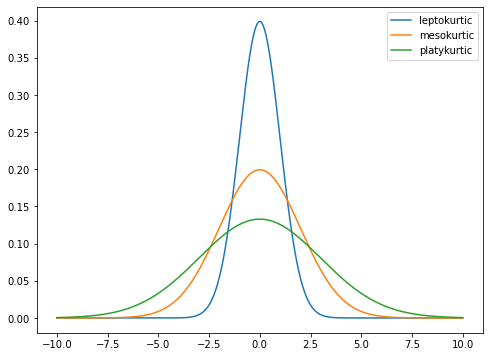

In [14]:
x = np.linspace(-10, 10, 10000)
y1 = norm.pdf(x, loc=0, scale=1)
y2 = norm.pdf(x, loc=0, scale=2)
y3 = norm.pdf(x, loc=0, scale=3)
kurtosis_stats = [(y1, "leptokurtic"), (y2, "mesokurtic"), (y3, "platykurtic")]

plt.figure(figsize=(8,6))
for k in kurtosis_stats:
    plt.plot(x, k[0], label=k[1])
plt.legend();

In [15]:
for k in kurtosis_stats:
    print("Kurtosis value of a {} distribution: {:.4f}".format(k[1], kurtosis(k[0], bias=0)))

Kurtosis value of a leptokurtic distribution: 3.3986
Kurtosis value of a mesokurtic distribution: -0.3099
Kurtosis value of a platykurtic distribution: -1.2536


Exploring kurtosis in `iris` dataset.

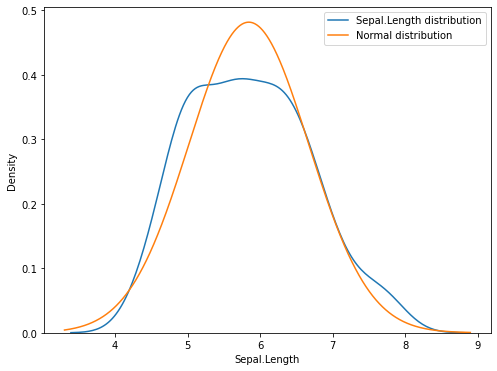

In [16]:
plt.figure(figsize=(8,6))
sns.kdeplot(iris['Sepal.Length'], label="Sepal.Length distribution")

x = np.linspace(min(iris['Sepal.Length'])-1, max(iris['Sepal.Length'])+1, 2000)
y = norm.pdf(x, loc=np.mean(iris['Sepal.Length']), scale=iris['Sepal.Length'].std(ddof=1))
plt.plot(x, y, label="Normal distribution")
plt.legend();

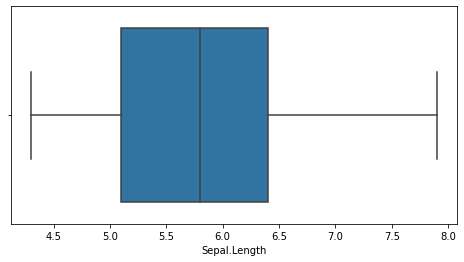

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x=iris['Sepal.Length']);

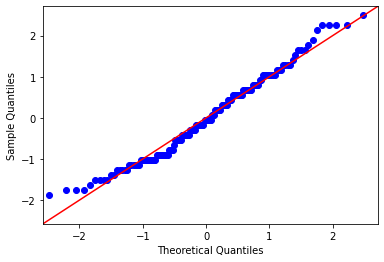

In [18]:
fg = qqplot(iris['Sepal.Length'], fit=True, line='45')

In [19]:
skew(iris['Sepal.Length'], bias=0)

0.3149109566369729

In [20]:
kurtosis(iris['Sepal.Length'], bias=0)

-0.5520640413156395

### Poisson Distribution

A discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate $\lambda$, and independently of the time since the last event. The Poisson distribution is used to describe the distribution of rare events in a large population.

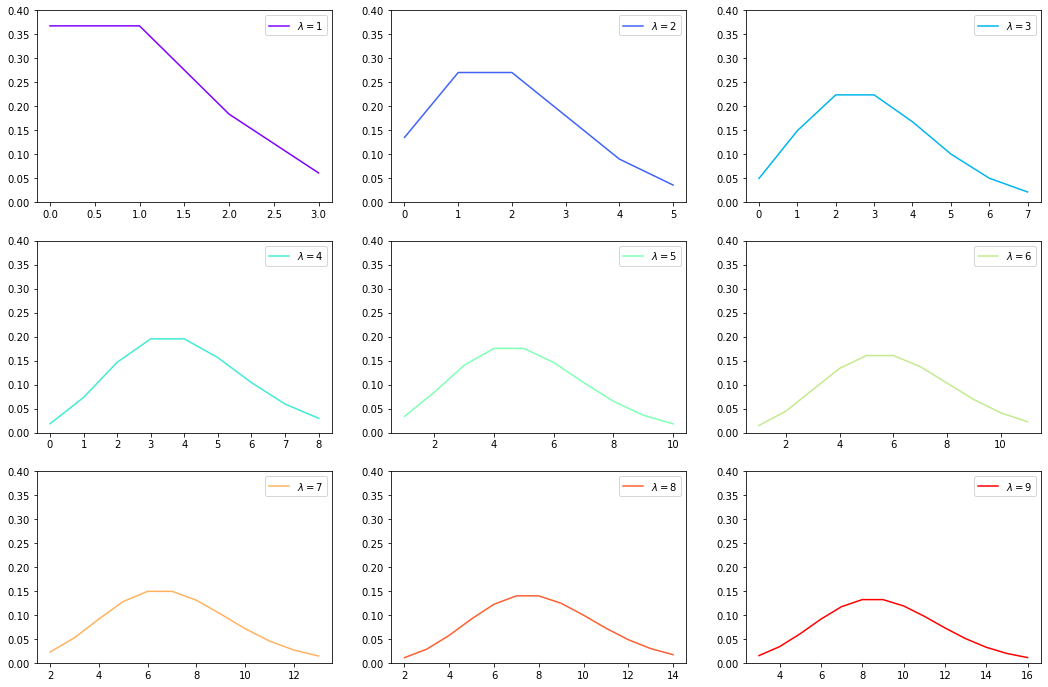

In [21]:
fg, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
colour = iter(plt.cm.rainbow(np.linspace(0,1,9)))

for i in range(3):
    for j in range(3):
        mu = 3 * i + j + 1
        x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
        c = next(colour)
        ax[i,j].plot(x, poisson.pmf(x, mu=mu), c=c, label=f"$\lambda = {mu}$")
        ax[i,j].set_ylim(0, 0.4)
        ax[i,j].legend();

### Uniform distribution

A symmetric probability distribution wherein a finite number of values are equally likely to be observed; every one of $n$ values has equal probability $\frac{1}{n}$.

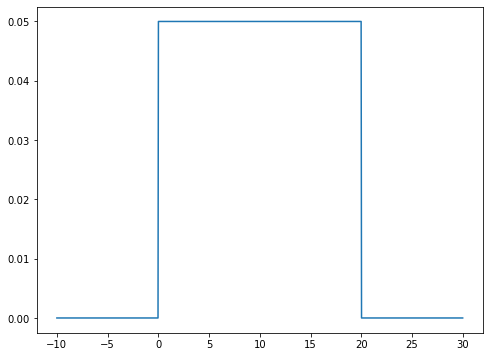

In [24]:
x = np.linspace(-10, 30, 1000)
plt.figure(figsize=(8,6))
plt.plot(x, uniform.pdf(x, loc=0, scale=20));

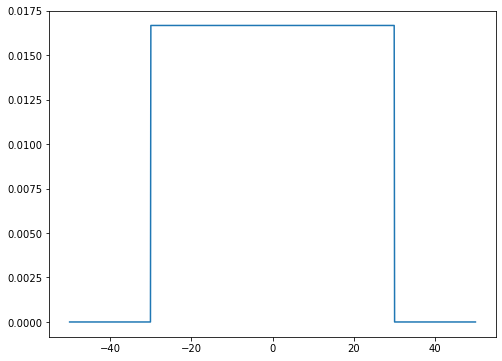

In [25]:
x = np.linspace(-50, 50, 1000)
plt.figure(figsize=(8,6))
plt.plot(x, uniform.pdf(x, loc=-30, scale=60));